In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [2]:
state_file= ("Research Data/State_median_income.csv")
birthplace_file= ("Research Data/birth_dataframe.csv")
salary_file= ("Research Data/NBAsalaries.csv")

state_df= pd.read_csv(state_file)
state_df.head()
income_poverty_df= state_df[['Name', 'Poverty Percent, All Ages', 'Median Household Income']]
income_poverty_df= income_poverty_df.rename(columns=({'Name': 'State'}))
income_poverty_df.head()
#income_poverty_df.dtypes

,State,"Poverty Percent, All Ages",Median Household Income
0,United States,13.1,61937.0
1,Alabama,16.8,49881.0
2,Alaska,11.1,74912.0
3,Arizona,14.1,59079.0
4,Arkansas,16.8,47094.0


In [3]:
birthplace_df= pd.read_csv(birthplace_file)
birthplace_df.head()

,Player,Date,City,State
0,Aaron Gordon,Sep 16 1995,San Jose,California
1,Aaron Holiday,Sep 30 1996,Ruston,Louisiana
2,Alec Burks,Jul 20 1991,Grandview,Missouri
3,Alex Caruso,Feb 28 1994,College Station,Texas
4,Al-Farouq Aminu,Sep 21 1990,Atlanta,Georgia


In [4]:
salary_df= pd.read_csv(salary_file)
salary_df.head()

,Player,2019-20
0,A.J. Hammons,350087
1,Aaron Gordon,19863636
2,Aaron Holiday,2239200
3,Abdel Nader,1618520
4,Admiral Schofield,898310


In [26]:
#Merge Dataframes to get Players with their birth State, salary, state household income, and state poverty percent
merged_household= pd.merge(income_poverty_df, birthplace_df, how='inner', on= ('State'))
merged_household['Median Household Income']= merged_household['Median Household Income'].astype(int)
merged_salary= pd.merge(merged_household, salary_df, how='inner', on=('Player'))
merged_salary= merged_salary.rename(columns={'2019-20': 'Player Salary'})

state_groupby= merged_salary.groupby('State')
state_income= state_groupby['Median Household Income'].mean()


state_groupby_df= pd.DataFrame(state_income)
state_groupby_df['# of Players Birthstate']= state_groupby['Player'].count()


state_groupby_df['Cumulative Player Salary']= state_groupby['Player Salary'].sum()
state_groupby_df['Median Player Salary']= state_groupby['Player Salary'].median()
state_groupby_df['Poverty Percent']= state_groupby['Poverty Percent, All Ages'].mean()
state_groupby_df.sort_values(['# of Players Birthstate'],ascending=False, inplace=True)

state_groupby_df.to_csv("Research Data/state_calculations.csv", index=True)
state_groupby_df

new_df = state_groupby_df.reset_index()
new_df['millions'] =  new_df['Median Player Salary'] /1000000


new_df

,State,Median Household Income,# of Players Birthstate,Cumulative Player Salary,Median Player Salary,Poverty Percent,millions
0,California,75250,40,453153917,6137031.5,12.8,6.137031
1,Texas,60632,27,187473037,3058800.0,14.9,3.058800
2,Illinois,65063,25,143467198,1618520.0,12.1,1.618520
3,New York,67648,18,163122045,4666680.0,13.7,4.666680
4,Pennsylvania,60891,18,120665585,3766720.0,12.2,3.766720
5,Florida,55433,15,85298315,2149560.0,13.7,2.149560
6,Indiana,55725,14,159594564,10946788.5,13.0,10.946789
7,Louisiana,48021,13,100717474,6392760.0,18.7,6.392760
8,Georgia,58634,13,88873474,5201400.0,14.5,5.201400
9,Maryland,83076,12,75193155,3282376.5,9.1,3.282376


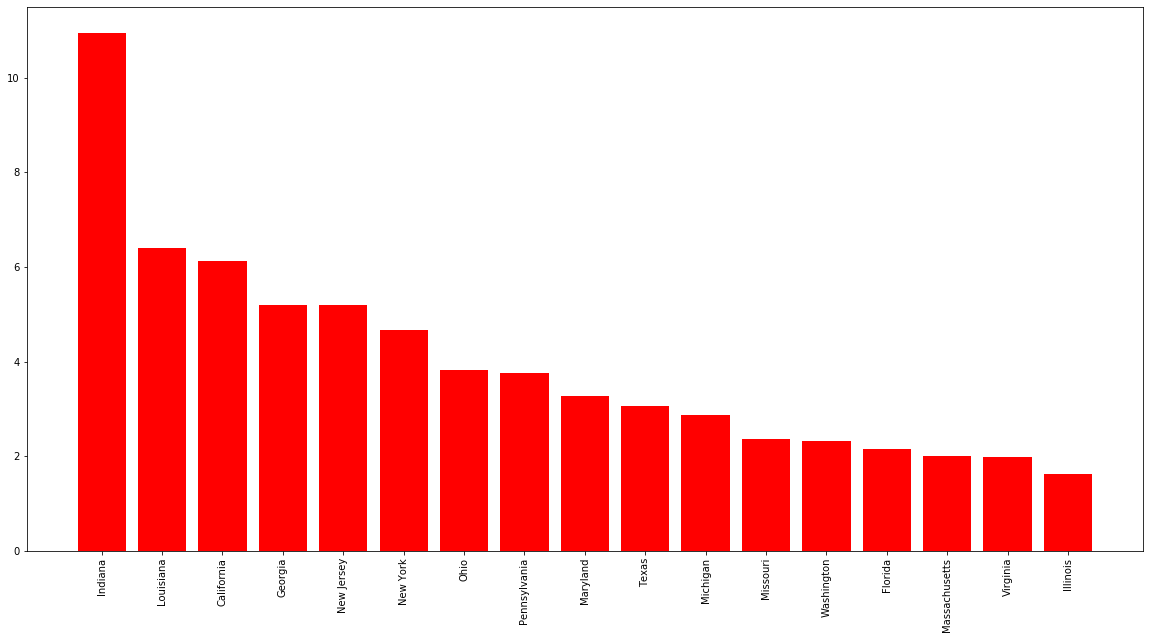

In [41]:
new_df.sort_values('millions', ascending = False, inplace = True)
five_state_df = new_df.loc[new_df["# of Players Birthstate"] > 5]

x_values = five_state_df['State']
y_values = five_state_df['millions']


plt.figure(figsize = (20,10))
plt.bar(x_values, y_values,color = 'r',align = 'center')
plt.xticks(rotation='vertical')
plt.savefig("images/Sab/state-median-income-5.pdf")
plt.show()

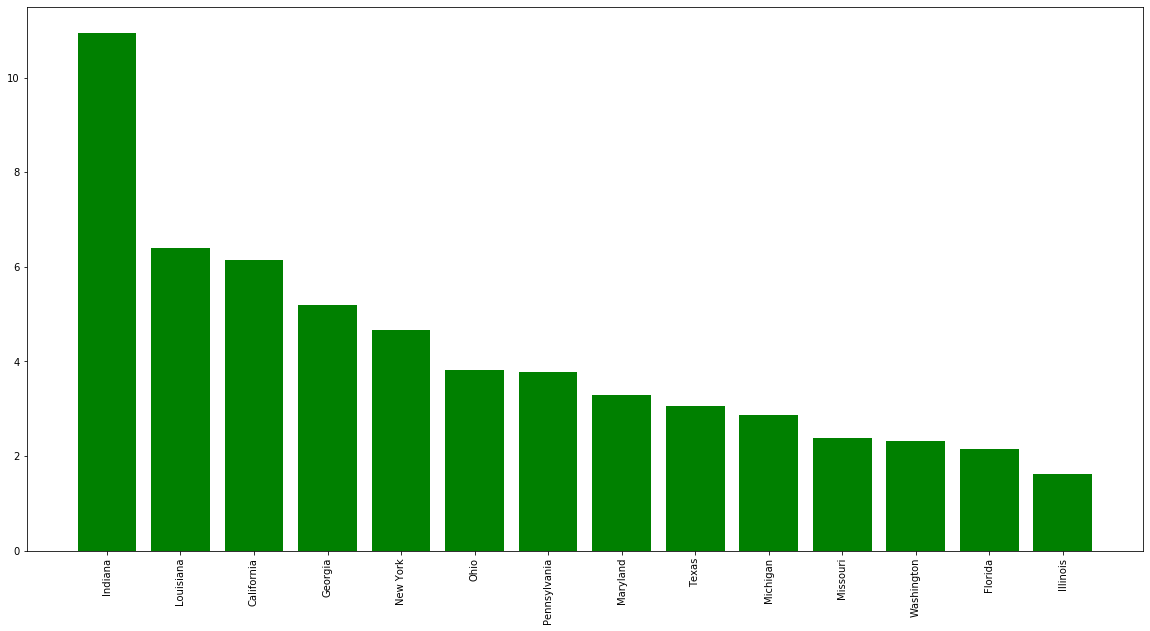

In [42]:
new_df.sort_values('millions', ascending = False, inplace = True)
ten_state_df = new_df.loc[new_df["# of Players Birthstate"] > 10]

x_values = ten_state_df['State']
y_values = ten_state_df['millions']


plt.figure(figsize = (20,10))
plt.bar(x_values, y_values,color = 'g',align = 'center')
plt.xticks(rotation='vertical')
plt.savefig("images/Sab/state-median-income-10.pdf")
plt.show()

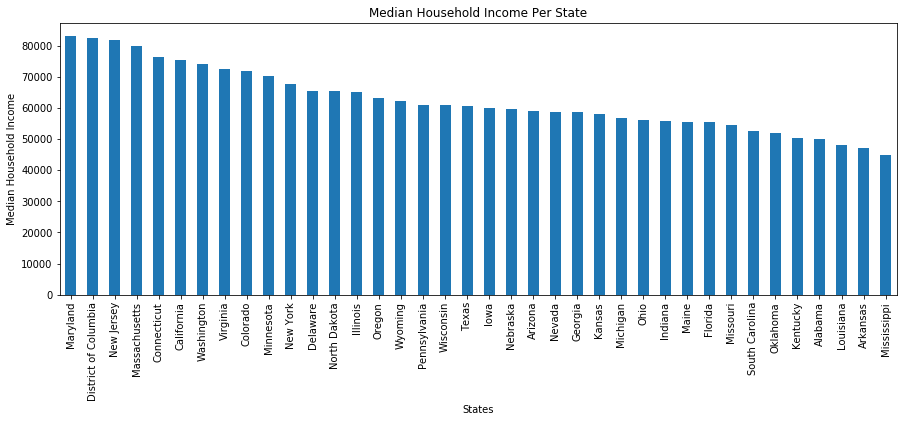

<Figure size 432x288 with 0 Axes>

In [39]:
state_median_income= state_groupby['Median Household Income'].mean()

data_to_plot= pd.DataFrame(state_median_income)
data_to_plot= data_to_plot.sort_values(['Median Household Income'], ascending=False)

state_household_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(15,5))
state_household_chart.set_xlabel('States')
state_household_chart.set_ylabel('Median Household Income')
state_household_chart.set_title('Median Household Income Per State')

plt.show()
plt.tight_layout()

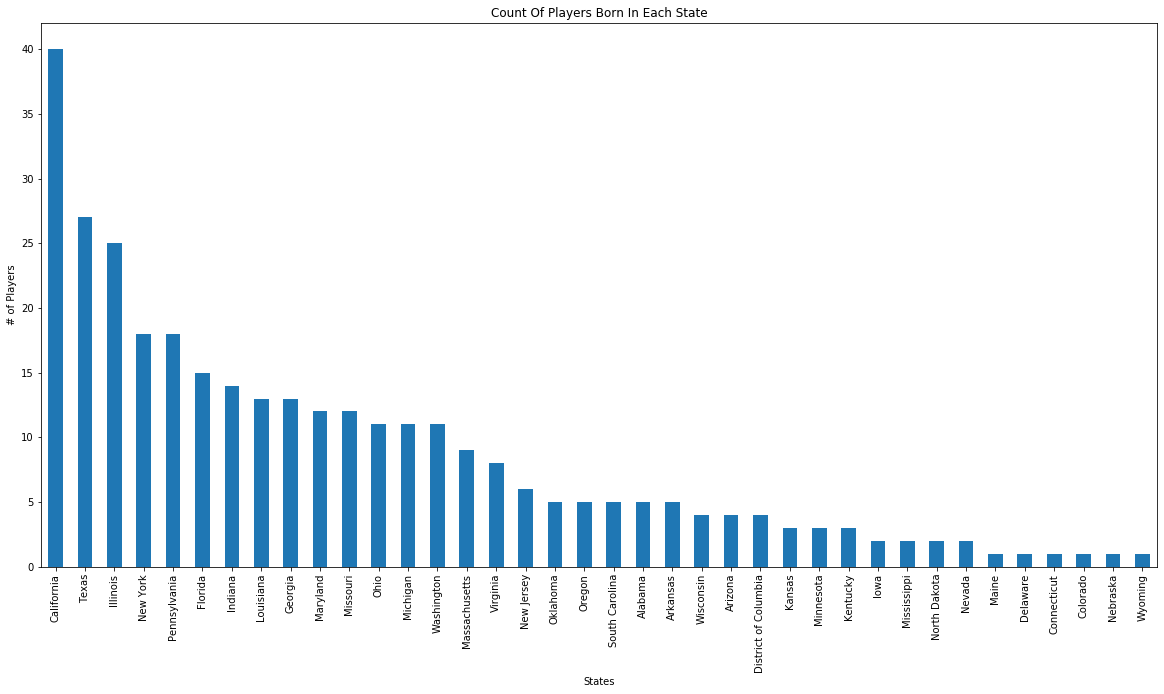

<Figure size 432x288 with 0 Axes>

In [21]:
state_player_count= state_groupby['Player'].count()

data_to_plot= pd.DataFrame(state_player_count)
data_to_plot= data_to_plot.sort_values(['Player'], ascending=False)

state_player_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(20,10))
state_player_chart.set_xlabel('States')
state_player_chart.set_ylabel('# of Players')
state_player_chart.set_title('Count Of Players Born In Each State')

plt.show()
plt.tight_layout()

The correlation between both factors is -0.19


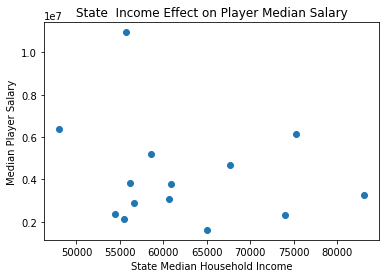

In [22]:
state_sort_player= state_groupby_df.sort_values(['# of Players Birthstate'], ascending= False)

x_data= state_sort_player.iloc[0:14,0]
y_data= state_sort_player.iloc[0:14,3]
correlation = st.pearsonr(x_data,y_data)
plt.scatter(x_data,y_data)
plt.xlabel('State Median Household Income')
plt.ylabel('Median Player Salary')
plt.title('State  Income Effect on Player Median Salary')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.28


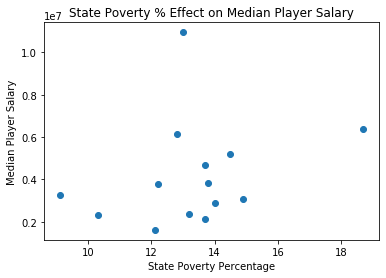

In [23]:
x_data= state_sort_player.iloc[0:14,4]
y_data= state_sort_player.iloc[0:14,3]
correlation = st.pearsonr(x_data,y_data)
plt.scatter(x_data,y_data)
plt.title('State Poverty % Effect on Median Player Salary')
plt.xlabel('State Poverty Percentage')
plt.ylabel('Median Player Salary')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

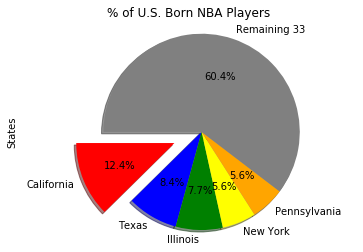

<Figure size 432x288 with 0 Axes>

In [10]:

labels= ['California', 'Texas', 'Illinois','New York', 'Pennsylvania', 'Remaining 33']
sizes= [40, 27, 25, 18, 18, 195]
colors= ['red', 'blue', 'green', 'yellow', 'orange', 'grey']
explode= [0.3,0,0,0,0,0]

# Design pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct= "%1.1f%%", shadow=True, startangle= 180)
plt.title('% of U.S. Born NBA Players')
plt.ylabel('States')

# show chart
plt.axis('equal')
plt.show()
plt.savefig("images/Bry/NBA_piechart.pdf")